<a href="https://colab.research.google.com/github/muqadas007-jerry/Disease-Diagnosis-Prediction/blob/main/2nd_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score

In [2]:
# Load dataset
df = pd.read_csv("heart.csv")

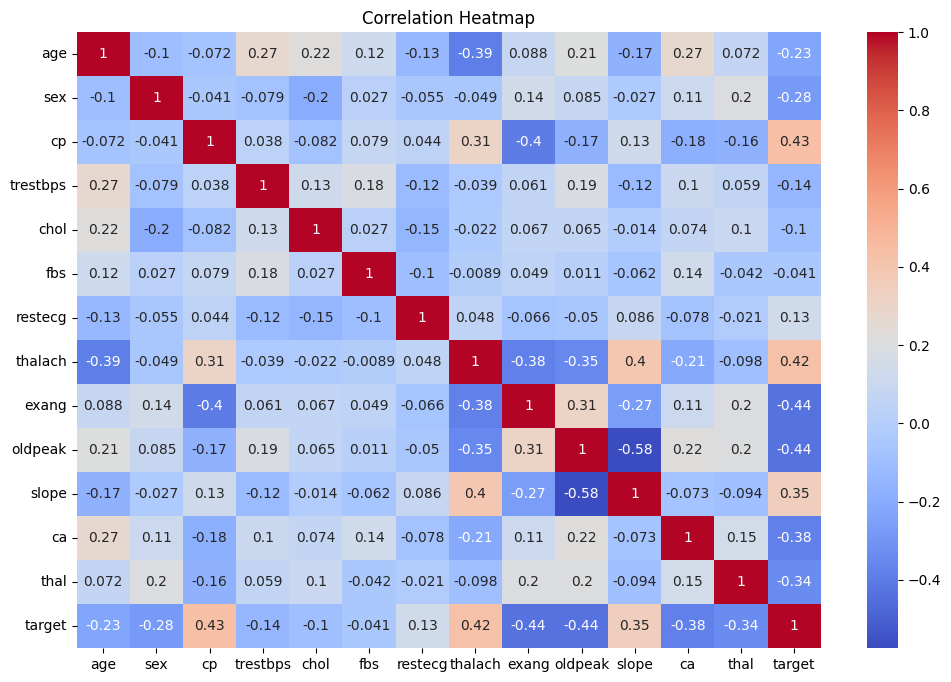

In [3]:
# 1. Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [4]:
# 2. Feature selection and scaling
X = df.drop("target", axis=1)
y = df["target"]

In [5]:
# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [6]:
# Scale selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Train models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(max_iter=500)
}
results = {}


In [9]:
# 4. Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    results[name] = {
        "model": model,
        "f1_score": f1,
        "auc_roc": auc,
        "fpr": fpr,
        "tpr": tpr,
        "report": classification_report(y_test, y_pred)
    }

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


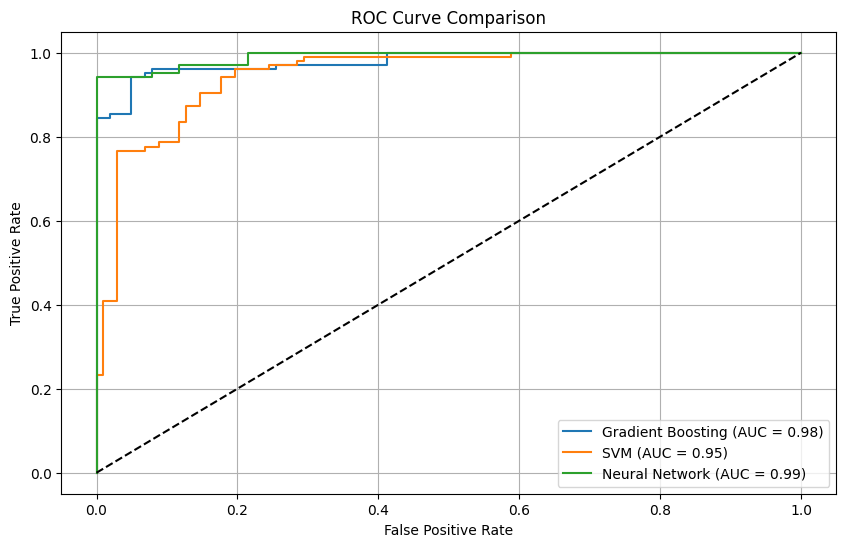

In [10]:
# 5. Plot ROC Curves
plt.figure(figsize=(10, 6))
for name in results:
    plt.plot(results[name]["fpr"], results[name]["tpr"], label=f"{name} (AUC = {results[name]['auc_roc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Print evaluation reports
for name in results:
    print(f"\n{name} Model")
    print("-" * 30)
    print(f"F1 Score: {results[name]['f1_score']:.2f}")
    print(f"AUC-ROC: {results[name]['auc_roc']:.2f}")
    print("Classification Report:\n", results[name]["report"])


Gradient Boosting Model
------------------------------
F1 Score: 0.94
AUC-ROC: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       102
           1       0.92      0.96      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205


SVM Model
------------------------------
F1 Score: 0.88
AUC-ROC: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       102
           1       0.84      0.93      0.88       103

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205


Neural Network Model
------------------------------
F1 Score: 0.94
AUC-ROC: 0.99
Classification Report:
               precision    recall  f